<a href="https://colab.research.google.com/github/mouraxy/room/blob/main/modelos/Anemia%20Level%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Please upvote↑ if you find this helpful (suggestions are very welcome!)`
  
#### 1. Objective and description...
Implementation of a supervised multiclass classifier to identify possible correlations between different degrees of childhood anemia, in children aged 0 to 59 months. Data from the [Nigerian Demographic and Health Census](https://github.com/mouraxy/data/blob/main/raw/childrenAnemia.csv), 2018.
  
<br>

Definition of each dataset attribute:

* **'mother_age'**: Mother's age in 5-year groups
* **'type_residence'**: Location of the house
* **'educational_level'**: Mother's level of education
* **'social_class'**: Mother's social class
* **'pregnancies'**: Births in the last five years
* **'pregnancy_age'**: Mother's age at pregnancy
* **'hemoglobin_level'**: Hemoglobin level adjusted for altitude and smoking
* **'anemia_level'**: Child's level of anemia
* **'mosquito_net'**: Has a mosquito net for sleeping
* **'smokes'**: Smokes cigarettes
* **'marital_status'**: Current marital status
* **'residence_partner'**: Currently lives with husband/partner
* **'breastfeeding_time'**: When the child was breastfed
* **'fever'**: Had a fever in the last two weeks
* **'hemoglobin_level2'**: Hemoglobin level adjusted for altitude
* **'level_anemia2'**: Child's level of anemia
* **'medication'**: Taking iron pills, [sprinkles](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC545194/) or syrup

<br>

**_Keywords:_** categorical encoding, correlation, duplicates, feature selection, missing data.

<br>

#### 2. Importing libraries...
Preparing the development environment. This is common practice when starting Python scripts and notebooks to ensure that all the necessary dependencies (features that other people have already written) are available.

In [169]:
!wget https://raw.githubusercontent.com/mouraxy/data/main/utils.py

--2024-02-26 00:04:27--  https://raw.githubusercontent.com/mouraxy/data/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899 (1.9K) [text/plain]
Saving to: ‘utils.py.2’

utils.py.2          100%[===================>]   1.85K  --.-KB/s    in 0s      

2024-02-26 00:04:28 (26.2 MB/s) - ‘utils.py.2’ saved [1899/1899]



In [170]:
# github functions
from utils import formatTable
from utils import genMetadata
from utils import showDuplicates
from utils import showTopValues

In [171]:
# tabular libraries
import pandas as pd
import missingno as ms

# machine learning libraries
from sklearn.preprocessing import LabelEncoder

# data visualization libraries
import seaborn as sns

<br>

#### 3. Loading data...
The initial step in ML algorithms consists of importing data from external sources into programming environments. It's the first step to building a model.

In [172]:
# connects to the database
url = 'https://raw.githubusercontent.com/mouraxy/data/main/raw/childrenAnemia.csv'

In [173]:
# changes the column names
columns = [
    'mother_age',
    'type_residence',
    'educational_level',
    'social_class',
    'pregnancies',
    'pregnancy_age',
    'hemoglobin_level',
    'anemia_level',
    'mosquito_net',
    'smokes',
    'marital_status',
    'residence_partner',
    'breastfeeding_time',
    'fever',
    'hemoglobin_level2',
    'level_anemia2',
    'medication'
]

In [174]:
# read the database
raw_data = pd.read_csv(
    url,
    delimiter=',',
    header=0,
    names=columns,
    encoding='latin-1'
)

<br>

#### 4. Exploratory analysis...
From here, i will try to understand the object of study. So, let's explore the characteristics of our data!

In [175]:
rows = len(raw_data)

In [176]:
print(f'Number of rows: {rows}')

Number of rows: 33924


In [177]:
print(formatTable(genMetadata(raw_data)))

┌────────────────────┬──────────────┬─────────┬───────────┬───────────┬────────┐
│ Variable           │ Data Types   │ Nulls   │ Minimum   │ Maximum   │ Mean   │
├────────────────────┼──────────────┼─────────┼───────────┼───────────┼────────┤
│ mother_age         │ object       │ 0       │ nan       │ nan       │ nan    │
│ type_residence     │ object       │ 0       │ nan       │ nan       │ nan    │
│ educational_level  │ object       │ 0       │ nan       │ nan       │ nan    │
│ social_class       │ object       │ 0       │ nan       │ nan       │ nan    │
│ pregnancies        │ int64        │ 0       │ 1.00      │ 6.00      │ 1.82   │
│ pregnancy_age      │ int64        │ 0       │ 12.00     │ 48.00     │ 19.57  │
│ hemoglobin_level   │ float64      │ 20788   │ 20.00     │ 218.00    │ 114.37 │
│ anemia_level       │ object       │ 20788   │ nan       │ nan       │ nan    │
│ mosquito_net       │ object       │ 0       │ nan       │ nan       │ nan    │
│ smokes             │ objec

<br>

#### 4.1 Duplicates...

Duplicate data affects the integrity of the data, compromising its accuracy and requiring a large storage allocation.

(4678, 0.13789647447234996)

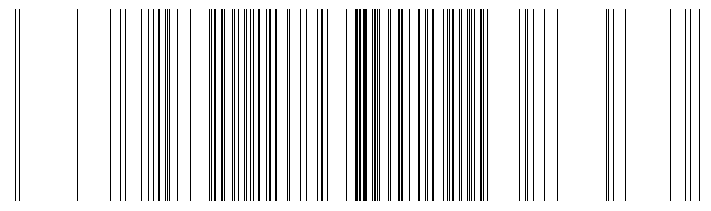

In [178]:
showDuplicates(raw_data)

<br>

#### 4.2 Distribution of data...

The distribution of the data in each variable identifies
which variables may be relevant. With this approach it will not be necessary to write extensive lines of code with visualization libraries.

In [179]:
print(formatTable(showTopValues(raw_data)))

┌────────────────────┬─────────────────┬─────────────────────┬──────────┐
│ Var                │ Top1            │ Top2                │ Others   │
├────────────────────┼─────────────────┼─────────────────────┼──────────┤
│ mother_age         │ 25-29           │ 30-34               │ +5       │
│ type_residence     │ Rural           │ Urban               │ +0       │
│ educational_level  │ No education    │ Secondary           │ +2       │
│ social_class       │ Poorest         │ Poorer              │ +3       │
│ pregnancies        │ 2               │ 1                   │ +4       │
│ pregnancy_age      │ 17              │ 16                  │ +32      │
│ hemoglobin_level   │ 113.0           │ 116.0               │ +121     │
│ anemia_level       │ Not anemic      │ Moderate            │ +2       │
│ mosquito_net       │ Yes             │ No                  │ +0       │
│ smokes             │ No              │ Yes                 │ +0       │
│ marital_status     │ Married        

<br>

#### 4.2.1 Target variable...
The target variable is what we should predict in a statistical or machine learning model. In other words, anticipating your results is the goal!

In [180]:
target = 'anemia_level'

<br>

#### 5. Data pre-processing...

Now, i'am going to manipulate the raw data into a more favorable format.  First, I'll remove all unwanted entries (empty rows and duplicates). This will make the models more impartial.

In [181]:
df_clean = raw_data.copy()

In [182]:
df_clean = df_clean.dropna()

In [183]:
df_clean = df_clean.drop_duplicates()

In [184]:
print(f'Rows left: {len(df_clean)}')

Rows left: 5878


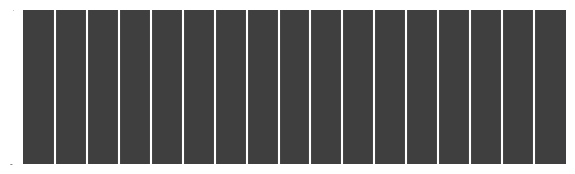

In [185]:
ms.matrix(df_clean, fontsize=0, labels=False, sparkline=False, figsize=(7, 2));

<br>

#### 5.1 Categorical encoding...
The next step is transform each categorical variable. Each label will be mapped to an integer, making it easier to use these variables in algorithms that require numerical entries.

In [186]:
df_clean[target].value_counts()

Not anemic    2464
Moderate      1767
Mild          1575
Severe          72
Name: anemia_level, dtype: int64

In [187]:
df_numeric = df_clean.copy()

In [188]:
target_map = {
'Not anemic': 0,
'Moderate': 1,
'Mild': 2,
'Severe': 3
}

df_numeric[target] = df_numeric[target].map(target_map)

In [189]:
txt_columns = df_numeric.select_dtypes(include=['object']).columns

print(f'Text columns: {txt_columns}')

Text columns: Index(['mother_age', 'type_residence', 'educational_level', 'social_class',
       'mosquito_net', 'smokes', 'marital_status', 'residence_partner',
       'breastfeeding_time', 'fever', 'level_anemia2', 'medication'],
      dtype='object')


In [190]:
le = LabelEncoder()

for col in txt_columns:
    df_numeric[col] = le.fit_transform(df_numeric[col])

<br>

#### 5.2 Correlation...
The correlation matrix is ​​a table that shows how variables are related to each other, ranging from -1 to 1. This visualization is essential to identify the most important characteristics of our data.

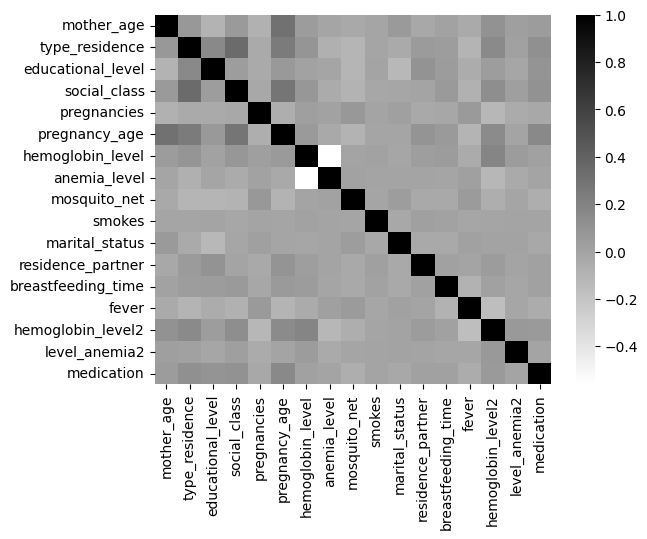

In [191]:
sns.heatmap(df_numeric.corr(), cmap='binary');

  
  <br>

  #### 5.3 Feature selection...
  
  Next, i will reshape our table, selecting only the variables that are most relevant to the problem. I will also remove columns that are very similar to each other to avoid a problem called [multicollinearity](https://pt.wikipedia.org/wiki/Multicolinearidade)


In [192]:
keep_cols = [
  target,
  'fever',
  'medication',
  'mother_age',
  'social_class',
  'hemoglobin_level'
]

In [193]:
df = df_numeric[keep_cols]
df.columns

Index(['anemia_level', 'fever', 'medication', 'mother_age', 'social_class',
       'hemoglobin_level'],
      dtype='object')